In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data08 = pd.read_csv('Resources/Forbes Global 2000 - 2008.csv')
data09 = pd.read_csv('Resources/Forbes Global 2000 - 2009.csv')
data10 = pd.read_csv('Resources/Forbes Global 2000 - 2010.csv')
data11 = pd.read_csv('Resources/Forbes Global 2000 - 2011.csv')
data12 = pd.read_csv('Resources/Forbes Global 2000 - 2012.csv')
data13 = pd.read_csv('Resources/Forbes Global 2000 - 2013.csv')
data14 = pd.read_csv('Resources/Forbes Global 2000 - 2014.csv')
data15 = pd.read_csv('Resources/Forbes Global 2000 - 2015.csv')
data16 = pd.read_csv('Resources/Forbes Global 2000 - 2016.csv')
data17 = pd.read_csv('Resources/Forbes Global 2000 - 2017.csv')
data18 = pd.read_csv('Resources/Forbes Global 2000 - 2018.csv', error_bad_lines=False)
data19 = pd.read_csv('Resources/Forbes Global 2000 - 2019.csv')
data20 = pd.read_csv('Resources/Forbes Global 2000 - 2020.csv')
data21 = pd.read_csv('Resources/Forbes Global 2000 - 2021.csv')

In [3]:
# Removing $ from the values
data20["Sales"] = data20["Sales"].str.replace('$','')
data20["Profits"] = data20["Profits"].str.replace('$','')
data20["Assets"] = data20["Assets"].str.replace('$','')
data20["Market Value"] = data20["Market Value"].str.replace('$','')

In [4]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data20['Sales']= data20['Sales'].replace(value,regex=True).map(pd.eval)
data20['Sales'] = round(data20['Sales'],2) # necessary?
data20['Profits']= data20['Profits'].replace(value,regex=True).map(pd.eval)
data20['Profits'] = round(data20['Profits'],2) # necessary?
data20['Assets']= data20['Assets'].replace(value,regex=True).map(pd.eval)
data20['Assets'] = round(data20['Assets'],2) # necessary?
data20['Market Value']= data20['Market Value'].replace(value,regex=True).map(pd.eval)
data20['Market Value'] = round(data20['Market Value'],2) # necessary?

In [5]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Name          2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profit        2000 non-null   object
 5   Assets        1999 non-null   object
 6   Market Value  2000 non-null   object
 7   Year          2000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


In [6]:
data21.columns

Index(['Rank', 'Name', 'Country', 'Sales', 'Profit', 'Assets', 'Market Value',
       'Year'],
      dtype='object')

In [7]:
data21.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value',
       'Year']

In [8]:
# Removing $ from the values
data21["Sales"] = data21["Sales"].str.replace('$','')
data21["Profits"] = data21["Profits"].str.replace('$','')
data21["Assets"] = data21["Assets"].str.replace('$','')
data21["Market Value"] = data21["Market Value"].str.replace('$','')

In [9]:
# Replaced one NaN value with 0 to allow for formatting
data21 = data21.fillna(0)

In [10]:
data21_corrected = pd.merge(data21, data20, on="Company", how="left")
data21_corrected.head()

,Rank_x,Company,Country,Sales_x,Profits_x,Assets_x,Market Value_x,Year_x,Rank_y,Country/Territory,Sales_y,Profits_y,Assets_y,Market Value_y,Sector,Industry,Year_y
0,1,ICBC,China,190.5 B,45.8 B,"4,914.7 B",249.5 B,2021,1.0,China,177.2,45.3,4322.5,242.3,Financials,Major Banks,2020.0
1,2,JPMorgan Chase,United States,136.2 B,40.4 B,"3,689.3 B",464.8 B,2021,3.0,United States,142.9,30.0,3139.4,291.7,Financials,Major Banks,2020.0
2,3,Berkshire Hathaway,United States,245.5 B,42.5 B,873.7 B,624.4 B,2021,4.0,United States,254.6,81.4,817.7,455.4,Financials,Investment Services,2020.0
3,4,China Construction Bank,China,173.5 B,39.3 B,"4,301.7 B",210.4 B,2021,2.0,China,162.1,38.9,3822.0,203.8,Financials,Major Banks,2020.0
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7 B,49.3 B,510.3 B,"1,897.2 B",2021,5.0,Saudi Arabia,329.8,88.2,398.3,1684.8,Energy,Oil & Gas,2020.0


In [11]:
data21_corrected = data21_corrected[['Rank_x', 'Company', 'Country', 'Sales_x', 'Profits_x', 'Assets_x',
       'Market Value_x', 'Year_x', 'Sector', 'Industry']]

In [12]:
data21_corrected.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Year', 'Sector', 'Industry']


In [13]:
data21 = data21_corrected

In [14]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data21['Sales']= data21['Sales'].replace(value,regex=True).map(pd.eval)
data21['Sales'] = round(data21['Sales'],2) # necessary?
data21['Profits']= data21['Profits'].replace(value,regex=True).map(pd.eval)
data21['Profits'] = round(data21['Profits'],2) # necessary?
data21['Assets']= data21['Assets'].replace(value,regex=True).map(pd.eval)
data21['Assets'] = round(data21['Assets'],2) # necessary?
data21['Market Value']= data21['Market Value'].replace(value,regex=True).map(pd.eval)
data21['Market Value'] = round(data21['Market Value'],2) # necessary?

In [15]:
# Changing 0 back to NaN value in case needed
data21.replace(0,np.nan, inplace=True)

In [16]:
# Should column names for the currencies reflect billions? 

In [17]:
# rename the columns for concat
data08.columns = ['Company', 'Industry', 'Country', 'Market Value',
       'Profits', 'Assets', 'Sales', 'Rank', 'Year']
data09.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Profits', 'Assets',
       'Sales', 'Rank', 'Year']
data10.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data11.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data15.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data16.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data17.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data18.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data19.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data20.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Sector', 'Industry', 'Year']

In [18]:
#combine the dataset together 
frames = [data08, data09, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21]

result = pd.concat(frames)

In [19]:
# Displaying new df
result

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Sector,Continent
0,HSBC Holdings,Banking,United Kingdom,180.81,19.13,2348.98,146.50,1.0,2008,NaN,NaN
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008,NaN,NaN
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,NaN,NaN
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,NaN,NaN
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,JTEKT,Auto & Truck Parts,Japan,3.50,-0.03,25.00,13.10,1996.0,2021,Consumer Discretionary,NaN
1996,Insurance Australia Group,Property & Casualty Insurance,Australia,9.30,-0.21,7.10,5.40,1997.0,2021,Financials,NaN
1997,Sumec Corporation,NaN,China,1.30,0.08,7.50,13.00,1997.0,2021,NaN,NaN
1998,Gold Fields,NaN,South Africa,8.90,0.72,2.60,3.90,1999.0,2021,NaN,NaN


In [20]:
#result.to_csv("aroissues-forbes-global-2000-2008-2019/combined.csv")

In [21]:
# find US data
us = result.loc[result["Country"] == "United States"]

In [22]:
# Removing columns
us.drop(columns=['Sector','Continent'], inplace=True)

In [23]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 1 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       7882 non-null   object 
 1   Industry      7600 non-null   object 
 2   Country       7882 non-null   object 
 3   Market Value  7882 non-null   float64
 4   Profits       7875 non-null   float64
 5   Assets        7881 non-null   float64
 6   Sales         7880 non-null   float64
 7   Rank          7882 non-null   float64
 8   Year          7882 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 615.8+ KB


In [24]:
us.dropna(inplace = True)

In [25]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7591 entries, 1 to 1930
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       7591 non-null   object 
 1   Industry      7591 non-null   object 
 2   Country       7591 non-null   object 
 3   Market Value  7591 non-null   float64
 4   Profits       7591 non-null   float64
 5   Assets        7591 non-null   float64
 6   Sales         7591 non-null   float64
 7   Rank          7591 non-null   float64
 8   Year          7591 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 593.0+ KB


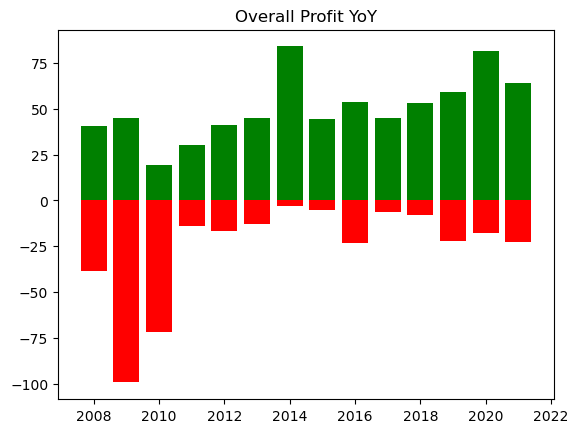

In [61]:
plt.bar(us["Year"], us["Profits"], linewidth=1, color=(us['Profits'] > 0).map({True: 'g', False: 'r'}))
plt.title("Overall Profit YoY")
plt.show()

In [52]:
max_val = us.groupby("Year").max()
max_val

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Profit Range
Year,,,,,,,,,
2008,iStar Financial,Utilities,United States,465.510,40.610,2187.630,378.800,1994.0,Above $10 bil
2009,Zions Bancorp,Utilities,United States,335.540,45.220,2175.050,425.700,1999.0,Above $10 bil
2010,Zions Bancorp,Utilities,United States,308.770,19.280,2223.300,408.210,2000.0,Above $10 bil
2011,Zions Bancorp,Tobacco,United States,407.200,30.500,3222.000,421.800,2000.0,Above $10 bil
2012,Zions Bancorp,Tobacco,United States,546.000,41.100,3211.500,447.000,2000.0,Above $10 bil
2013,Zoetis,Trucking,United States,416.600,44.900,3226.200,469.200,1999.0,Above $10 bil
2014,eBay,Trucking,United States,483.100,84.000,3270.100,476.500,1999.0,Above $10 bil
2015,iHeartMedia,Trucking,United States,741.782,44.462,3248.176,485.651,2000.0,Above $10 bil
2016,iHeartMedia,Trucking,United States,585.951,53.731,3221.917,482.130,2000.0,Above $10 bil


<BarContainer object of 14 artists>

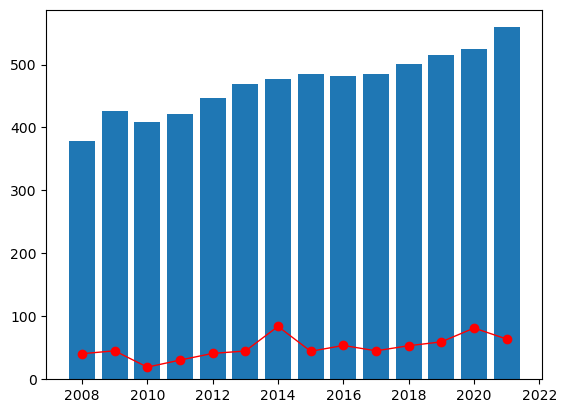

In [63]:
plt.plot(max_val.index,max_val["Profits"], marker="o", color="red", linewidth=1)
plt.bar(max_val.index, max_val["Sales"], linewidth=1)

<BarContainer object of 7591 artists>

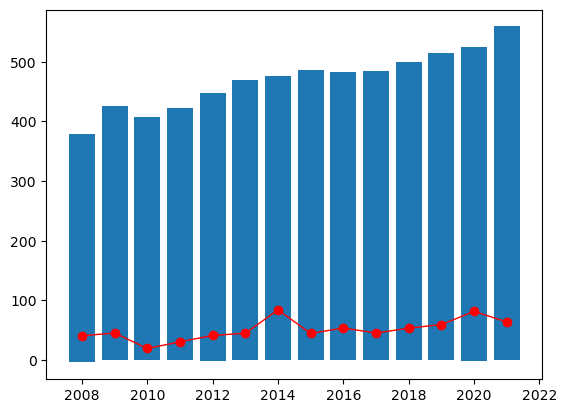

In [66]:
plt.plot(max_val.index,max_val["Profits"], marker="o", color="red", linewidth=1)
plt.bar(us["Year"], us["Sales"], linewidth=1)

<AxesSubplot:xlabel='Year'>

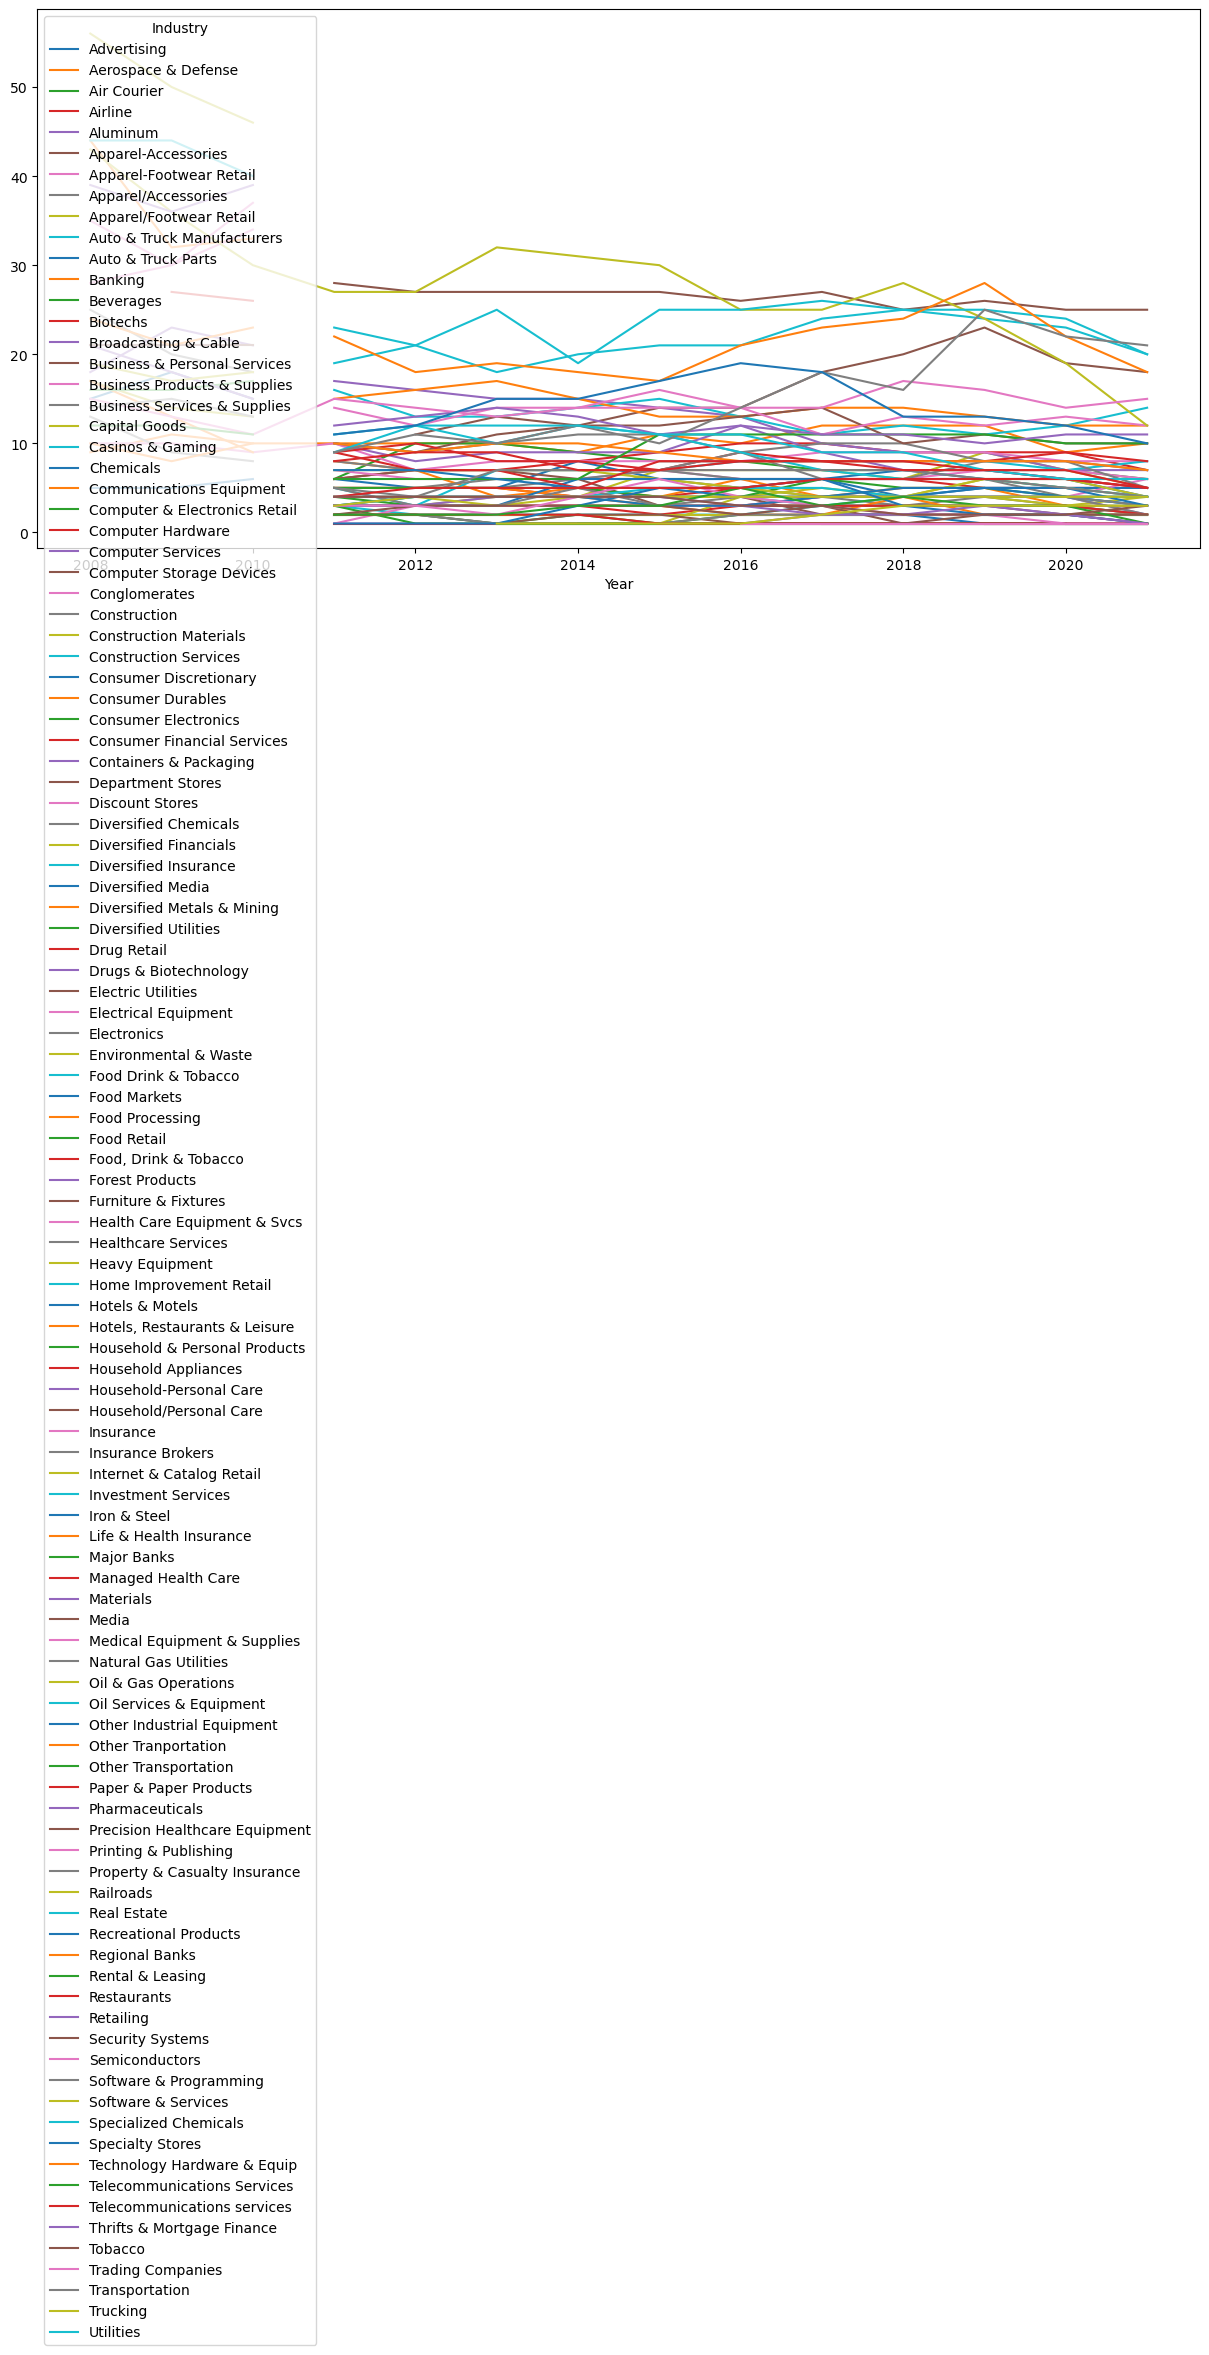

In [72]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
us.groupby(['Year','Industry']).count()['Profits'].unstack().plot(ax=ax)